# Project - Dataset 1 (Kaggle)

#### UFC Fight Data
by Karmanya Aggarwal

EDA & Data Exploration done by Karan Kathayat & Siddhartha Vale

With Accuracy models created by Bart Gortat


Measuring **accuracies** of dataset 1 with a range of models

#### Dataset Upload & Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import random as rng
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#SciKit Learn Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [3]:
# Loading Dataset "data.csv"
data = pd.read_csv("data.csv")

#### EDA & Data Exploration

In [4]:
display(data.head())

BPrev  BStreak  B_Age  B_Height                          B_HomeTown  B_ID  \
0      1        1   23.0     182.0                        Trento Italy  2783   
1      0        0   32.0     175.0  Careiro da Várzea, Amazonas Brazil  2208   
2      2        0   38.0     172.0                      Kanagawa Japan   721   
3      0        0   23.0     170.0                      Tijuana Mexico  2825   
4      3        1   30.0     167.0                     Spokane, WA USA  2260   

          B_Location                 B_Name  B_Weight  \
0  Mezzocorona Italy         Marvin Vettori        84   
1   Pharr, Texas USA  Carlos Diego Ferreira        70   
2        Tokyo Japan          Takanori Gomi        70   
3     Tijuana Mexico         Brandon Moreno        56   
4    Spokane, WA USA     Elizabeth Phillips        61   

   B__Round1_Grappling_Reversals_Landed   ...    R__Round5_TIP_Ground Time  \
0                                   0.0   ...                          NaN   
1                                   NaN   ...                          NaN   
2                                   0.0   ...                          NaN   
3                                   NaN   ...                          NaN   
4                                   0.0   ...                          NaN   

   R__Round5_TIP_Guard Control Time  R__Round5_TIP_Half Guard Control Time  \
0                               NaN                                    NaN   
1                               NaN                                    NaN   
2                               NaN                                    NaN   
3                               NaN                                    NaN   
4                               NaN                                    NaN   

   R__Round5_TIP_Misc. Ground Control Time  R__Round5_TIP_Mount Control Time  \
0                                      NaN                               NaN   
1                                      NaN                               NaN   
2                                      NaN                               NaN   
3                                      NaN                               NaN   
4                                      NaN                               NaN   

   R__Round5_TIP_Neutral Time  R__Round5_TIP_Side Control Time  \
0                         NaN                              NaN   
1                         NaN                              NaN   
2                         NaN                              NaN   
3                         NaN                              NaN   
4                         NaN                              NaN   

   R__Round5_TIP_Standing Time   winby  winner  
0                          NaN     DEC     red  
1                          NaN     SUB    blue  
2                          NaN  KO/TKO     red  
3                          NaN     SUB    blue  
4                          NaN     DEC     red  

[5 rows x 895 columns]

In [5]:
data.tail()

BPrev  BStreak  B_Age  B_Height                     B_HomeTown  B_ID  \
1472      0        0   26.0     172.0  Tlaltenango, Zacatecas Mexico  2355   
1473      2        1   26.0     165.0             Tampa, Florida USA  2610   
1474      3        2   36.0     187.0   Doylestown, Pennsylvania USA  1694   
1475      3        1   31.0     167.0                Irvine Scotland  2339   
1476      2        1   31.0     187.0                The Netherlands   786   

                           B_Location             B_Name  B_Weight  \
1472        San Diego, California USA      Jose Quinonez        61   
1473               Tampa, Florida USA      Geane Herrera        56   
1474       Dana Point, California USA    Patrick Cummins        93   
1475                 Glasgow Scotland  Joanne Calderwood        52   
1476  Leiden, Holland The Netherlands     Gegard Mousasi        84   

      B__Round1_Grappling_Reversals_Landed   ...    R__Round5_TIP_Ground Time  \
1472                                   NaN   ...                          NaN   
1473                                   0.0   ...                          0.0   
1474                                   0.0   ...                          NaN   
1475                                   0.0   ...                          0.0   
1476                                   0.0   ...                          NaN   

      R__Round5_TIP_Guard Control Time  R__Round5_TIP_Half Guard Control Time  \
1472                               NaN                                    NaN   
1473                               0.0                                    0.0   
1474                               NaN                                    NaN   
1475                               0.0                                    0.0   
1476                               NaN                                    NaN   

      R__Round5_TIP_Misc. Ground Control Time  \
1472                                      NaN   
1473                                      0.0   
1474                                      NaN   
1475                                      0.0   
1476                                      NaN   

      R__Round5_TIP_Mount Control Time  R__Round5_TIP_Neutral Time  \
1472                               NaN                         NaN   
1473                               0.0                         0.0   
1474                               NaN                         NaN   
1475                               0.0                       301.0   
1476                               NaN                         NaN   

      R__Round5_TIP_Side Control Time  R__Round5_TIP_Standing Time   winby  \
1472                              NaN                          NaN     DEC   
1473                              0.0                          0.0     DEC   
1474                              NaN                          NaN     DEC   
1475                              0.0                        301.0  KO/TKO   
1476                              NaN                          NaN     SUB   

      winner  
1472     red  
1473     red  
1474    blue  
1475    blue  
1476     red  

[5 rows x 895 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Columns: 895 entries, BPrev to winner
dtypes: float64(873), int64(13), object(9)
memory usage: 10.1+ MB


In [7]:
data.describe()

BPrev      BStreak        B_Age     B_Height         B_ID  \
count  1477.000000  1477.000000  1474.000000  1476.000000  1477.000000   
mean      1.735274     0.654705    30.954545   177.451220  1964.633040   
std       1.895561     1.057269     4.020311     8.561541   666.949141   
min       0.000000     0.000000    20.000000   152.000000   129.000000   
25%       0.000000     0.000000    28.000000   172.000000  1755.000000   
50%       1.000000     0.000000    31.000000   177.000000  2156.000000   
75%       3.000000     1.000000    34.000000   182.000000  2337.000000   
max      11.000000     7.000000    46.000000   213.000000  2882.000000   

          B_Weight  B__Round1_Grappling_Reversals_Landed  \
count  1477.000000                            978.000000   
mean     73.804333                              0.036810   
std      14.980531                              0.193748   
min      52.000000                              0.000000   
25%      65.000000                              0.000000   
50%      70.000000                              0.000000   
75%      84.000000                              0.000000   
max     120.000000                              2.000000   

       B__Round1_Grappling_Standups_Landed  \
count                           978.000000   
mean                              0.896728   
std                               1.255722   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               1.000000   
max                               9.000000   

       B__Round1_Grappling_Submissions_Attempts  \
count                                978.000000   
mean                                   0.431493   
std                                    0.830527   
min                                    0.000000   
25%                                    0.000000   
50%                                    0.000000   
75%                                    1.000000   
max                                    6.000000   

       B__Round1_Grappling_Takedowns_Attempts             ...               \
count                              978.000000             ...                
mean                                 2.986708             ...                
std                                  3.987291             ...                
min                                  0.000000             ...                
25%                                  0.000000             ...                
50%                                  2.000000             ...                
75%                                  4.000000             ...                
max                                 33.000000             ...                

       R__Round5_TIP_Distance Time  R__Round5_TIP_Ground Control Time  \
count                   144.000000                         144.000000   
mean                    211.965278                          34.062500   
std                     139.412374                          68.819742   
min                       0.000000                           0.000000   
25%                     110.000000                           0.000000   
50%                     214.000000                           0.000000   
75%                     294.500000                          47.500000   
max                     647.000000                         496.000000   

       R__Round5_TIP_Ground Time  R__Round5_TIP_Guard Control Time  \
count                 144.000000                        144.000000   
mean                   66.604167                          5.527778   
std                    94.574736                         22.374419   
min                     0.000000                          0.000000   
25%                     2.000000                          0.000000   
50%                     9.500000                          0.000000   
75%                   109.000000                          0.000000   
max      

In [8]:
data.mean(axis=0)

BPrev                                                       1.735274
BStreak                                                     0.654705
B_Age                                                      30.954545
B_Height                                                  177.451220
B_ID                                                     1964.633040
B_Weight                                                   73.804333
B__Round1_Grappling_Reversals_Landed                        0.036810
B__Round1_Grappling_Standups_Landed                         0.896728
B__Round1_Grappling_Submissions_Attempts                    0.431493
B__Round1_Grappling_Takedowns_Attempts                      2.986708
B__Round1_Grappling_Takedowns_Landed                        1.210634
B__Round1_Strikes_Body Significant Strikes_Attempts        11.490798
B__Round1_Strikes_Body Significant Strikes_Landed           7.623722
B__Round1_Strikes_Body Total Strikes_Attempts              16.317996
B__Round1_Strikes_Body Total Strik

In [9]:
data['R_Age'].describe(), data['B_Age'].describe()

(count    1476.000000
 mean       31.380081
 std         4.098927
 min        21.000000
 25%        28.000000
 50%        31.000000
 75%        34.000000
 max        46.000000
 Name: R_Age, dtype: float64, count    1474.000000
 mean       30.954545
 std         4.020311
 min        20.000000
 25%        28.000000
 50%        31.000000
 75%        34.000000
 max        46.000000
 Name: B_Age, dtype: float64)

In [10]:
test = data.groupby(['R_Age','B_Age'])
test['B_Age'].mean().unstack()

B_Age  20.0  21.0  22.0  23.0  24.0  25.0  26.0  27.0  28.0  29.0  ...   36.0  \
R_Age                                                              ...          
21.0    NaN   NaN   NaN   NaN   NaN  25.0  26.0  27.0   NaN   NaN  ...    NaN   
22.0    NaN   NaN   NaN   NaN  24.0   NaN   NaN  27.0  28.0  29.0  ...    NaN   
23.0   20.0   NaN   NaN   NaN  24.0   NaN  26.0  27.0  28.0  29.0  ...   36.0   
24.0    NaN   NaN   NaN   NaN  24.0   NaN  26.0  27.0  28.0  29.0  ...    NaN   
25.0    NaN   NaN  22.0  23.0  24.0  25.0  26.0  27.0  28.0  29.0  ...   36.0   
26.0    NaN   NaN   NaN   NaN  24.0  25.0  26.0  27.0  28.0  29.0  ...    NaN   
27.0    NaN   NaN   NaN  23.0  24.0  25.0  26.0  27.0  28.0  29.0  ...   36.0   
28.0    NaN   NaN   NaN  23.0  24.0  25.0  26.0  27.0  28.0  29.0  ...   36.0   
29.0    NaN  21.0  22.0  23.0  24.0  25.0  26.0  27.0  28.0  29.0  ...   36.0   
30.0    NaN   NaN   NaN  23.0  24.0  25.0  26.0  27.0  28.0  29.0  ...   36.0   
31.0    NaN   NaN   NaN  23.0  24.0  25.0  26.0  27.0  28.0  29.0  ...   36.0   
32.0    NaN   NaN   NaN  23.0   NaN  25.0  26.0  27.0  28.0  29.0  ...   36.0   
33.0    NaN   NaN   NaN  23.0  24.0  25.0  26.0  27.0  28.0  29.0  ...   36.0   
34.0    NaN   NaN   NaN  23.0   NaN  25.0   NaN  27.0  28.0  29.0  ...   36.0   
35.0    NaN  21.0  22.0  23.0  24.0  25.0  26.0  27.0  28.0  29.0  ...   36.0   
36.0    NaN   NaN   NaN  23.0   NaN   NaN  26.0  27.0  28.0  29.0  ...   36.0   
37.0    NaN   NaN   NaN   NaN  24.0  25.0  26.0  27.0  28.0  29.0  ...   36.0   
38.0    NaN   NaN   NaN   NaN  24.0  25.0   NaN  27.0  28.0  29.0  ...   36.0   
39.0    NaN   NaN   NaN   NaN   NaN  25.0  26.0  27.0  28.0  29.0  ...   36.0   
40.0    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  29.0  ...   36.0   
41.0    NaN   NaN   NaN   NaN   NaN   NaN   NaN  27.0  28.0  29.0  ...    NaN   
43.0    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
44.0    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
46.0    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   

B_Age  37.0  38.0  39.0  40.0  41.0  42.0  43.0  44.0  46.0  
R_Age                                                        
21.0    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
22.0    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
23.0    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
24.0    NaN  38.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
25.0   37.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
26.0   37.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
27.0   37.0  38.0  39.0   NaN   NaN   NaN   NaN   NaN   NaN  
28.0   37.0  38.0   NaN  40.0   NaN   NaN   NaN   NaN   NaN  
29.0   37.0  38.0  39.0  40.0   NaN   NaN   NaN   NaN   NaN  
30.0   37.0  38.0  39.0   NaN   NaN   NaN   NaN   NaN   NaN  
31.0   37.0   NaN  39.0   NaN   NaN   NaN   NaN   NaN   NaN  
32.0   37.0  38.0  39.0   NaN   NaN   NaN   NaN   NaN   NaN  
33.0   37.0  38.0  39.0  40.0   NaN   NaN   NaN   NaN   NaN  
34.0   37.0  38.0  39.0   NaN   NaN   NaN  43.0   NaN   NaN  
35.0   37.0  38.0   NaN  40.0  41.0   NaN   NaN   NaN  46.0  
36.0   37.0  38.0   NaN   NaN   NaN   NaN  43.0   NaN  46.0  
37.0   37.0  38.0  39.0   NaN   NaN  42.0   NaN   NaN   NaN  
38.0   37.0  38.0  39.0   NaN  41.0   NaN   NaN  44.0  46.0  
39.0    NaN  38.0  39.0  40.0   NaN   NaN  43.0   NaN  46.0  
40.0   37.0   NaN   NaN  40.0  41.0   NaN   NaN   NaN   NaN  
41.0    NaN  38.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
43.0   37.0   NaN   NaN  40.0   NaN   NaN   NaN   NaN   NaN  
44.0    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
46.0    NaN   NaN  39.0   NaN   NaN   NaN   NaN   NaN   NaN  

[24 rows x 26 columns]

### Blue vs. Red - Round 1

In [67]:
# Round1_Grappling_Takedowns_Landed
data['B__Round1_Grappling_Takedowns_Landed'].describe(), data['R__Round1_Grappling_Takedowns_Landed'].describe()

(count    1235.000000
 mean        0.958704
 std         1.637015
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%         1.000000
 max        17.000000
 Name: B__Round1_Grappling_Takedowns_Landed, dtype: float64,
 count    1235.000000
 mean        1.217004
 std         1.676862
 min         0.000000
 25%         0.000000
 50%         1.000000
 75%         2.000000
 max        17.000000
 Name: R__Round1_Grappling_Takedowns_Landed, dtype: float64)

In [57]:
# Round1_Strikes_Body Significant Strikes_Landed
data['B__Round1_Strikes_Body Significant Strikes_Landed'].describe(), data['R__Round1_Strikes_Body Significant Strikes_Landed'].describe()

(count    1235.000000
 mean        6.037247
 std         8.050906
 min         0.000000
 25%         0.000000
 50%         3.000000
 75%         9.000000
 max        56.000000
 Name: B__Round1_Strikes_Body Significant Strikes_Landed, dtype: float64,
 count    1235.000000
 mean        7.625101
 std         8.808029
 min         0.000000
 25%         1.000000
 50%         5.000000
 75%        11.000000
 max        61.000000
 Name: R__Round1_Strikes_Body Significant Strikes_Landed, dtype: float64)

In [69]:
# Round1_Strikes_Clinch Total Strikes_Landed
data['B__Round1_Strikes_Clinch Total Strikes_Landed'].describe(), data['R__Round1_Strikes_Clinch Total Strikes_Landed'].describe()

(count    1235.000000
 mean        9.783806
 std        15.640389
 min         0.000000
 25%         0.000000
 50%         4.000000
 75%        13.000000
 max       134.000000
 Name: B__Round1_Strikes_Clinch Total Strikes_Landed, dtype: float64,
 count    1235.000000
 mean       11.572470
 std        14.287913
 min         0.000000
 25%         1.000000
 50%         6.000000
 75%        17.000000
 max       103.000000
 Name: R__Round1_Strikes_Clinch Total Strikes_Landed, dtype: float64)

In [70]:
# Round1_Strikes_Distance Head Kicks_Landed
data['B__Round1_Strikes_Distance Head Kicks_Landed'].describe(), data['R__Round1_Strikes_Distance Head Kicks_Landed'].describe()

(count    1235.000000
 mean        0.162753
 std         0.656773
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%         0.000000
 max         7.000000
 Name: B__Round1_Strikes_Distance Head Kicks_Landed, dtype: float64,
 count    1235.000000
 mean        0.264777
 std         0.919982
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%         0.000000
 max        10.000000
 Name: R__Round1_Strikes_Distance Head Kicks_Landed, dtype: float64)

In [71]:
# Round1_Strikes_Distance Head Strikes_Landed
data['B__Round1_Strikes_Distance Head Strikes_Landed'].describe(), data['R__Round1_Strikes_Distance Head Strikes_Landed'].describe()

(count    1235.000000
 mean       11.036437
 std        14.199133
 min         0.000000
 25%         0.000000
 50%         6.000000
 75%        16.000000
 max        97.000000
 Name: B__Round1_Strikes_Distance Head Strikes_Landed, dtype: float64,
 count    1235.000000
 mean       13.676113
 std        14.959222
 min         0.000000
 25%         3.000000
 50%         9.000000
 75%        19.000000
 max       131.000000
 Name: R__Round1_Strikes_Distance Head Strikes_Landed, dtype: float64)

**From this analysis we can see that the means for all the moves show a greater value in the Red corner than in the blue, this corresponds with what we see from the age difference between fighters from these two corners aswell.**

**Figthers on the Red corner are considered the Favorites while the fighters on the blue corner are the Underdogs. Red Fighters in this analysis seem to have a higer strike & grapple rate this could be due to their increased skill because of more experience**

### Blue vs. Red - Round 2

In [72]:
# Round2_Grappling_Takedowns_Landed
data['B__Round2_Grappling_Takedowns_Landed'].describe(), data['R__Round2_Grappling_Takedowns_Landed'].describe()

(count    1235.000000
 mean        0.710121
 std         1.293364
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%         1.000000
 max         8.000000
 Name: B__Round2_Grappling_Takedowns_Landed, dtype: float64,
 count    1235.000000
 mean        0.882591
 std         1.396330
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%         1.000000
 max         9.000000
 Name: R__Round2_Grappling_Takedowns_Landed, dtype: float64)

In [73]:
# Round2_Strikes_Body Significant Strikes_Landed
data['B__Round2_Strikes_Body Significant Strikes_Landed'].describe(), data['R__Round2_Strikes_Body Significant Strikes_Landed'].describe()

(count    1235.000000
 mean        4.693117
 std         7.147819
 min         0.000000
 25%         0.000000
 50%         2.000000
 75%         6.000000
 max        60.000000
 Name: B__Round2_Strikes_Body Significant Strikes_Landed, dtype: float64,
 count    1235.000000
 mean        6.029960
 std         7.941433
 min         0.000000
 25%         0.000000
 50%         3.000000
 75%         8.000000
 max        60.000000
 Name: R__Round2_Strikes_Body Significant Strikes_Landed, dtype: float64)

In [74]:
# Round2_Strikes_Clinch Total Strikes_Landed
data['B__Round2_Strikes_Clinch Total Strikes_Landed'].describe(), data['R__Round2_Strikes_Clinch Total Strikes_Landed'].describe()

(count    1235.000000
 mean        6.757895
 std        11.100346
 min         0.000000
 25%         0.000000
 50%         2.000000
 75%         9.000000
 max        76.000000
 Name: B__Round2_Strikes_Clinch Total Strikes_Landed, dtype: float64,
 count    1235.000000
 mean        8.479352
 std        12.359690
 min         0.000000
 25%         0.000000
 50%         3.000000
 75%        12.000000
 max        86.000000
 Name: R__Round2_Strikes_Clinch Total Strikes_Landed, dtype: float64)

In [75]:
# Round2_Strikes_Distance Head Kicks_Landed
data['B__Round2_Strikes_Distance Head Kicks_Landed'].describe(), data['R__Round2_Strikes_Distance Head Kicks_Landed'].describe()

(count    1235.000000
 mean        0.133603
 std         0.549757
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%         0.000000
 max         6.000000
 Name: B__Round2_Strikes_Distance Head Kicks_Landed, dtype: float64,
 count    1235.000000
 mean        0.228340
 std         0.756178
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%         0.000000
 max         6.000000
 Name: R__Round2_Strikes_Distance Head Kicks_Landed, dtype: float64)

In [76]:
# Round2_Strikes_Distance Head Strikes_Landed
data['B__Round2_Strikes_Distance Head Strikes_Landed'].describe(), data['R__Round2_Strikes_Distance Head Strikes_Landed'].describe()

(count    1235.000000
 mean        9.978947
 std        14.187773
 min         0.000000
 25%         0.000000
 50%         4.000000
 75%        15.000000
 max        91.000000
 Name: B__Round2_Strikes_Distance Head Strikes_Landed, dtype: float64,
 count    1235.000000
 mean       12.562753
 std        15.641079
 min         0.000000
 25%         1.000000
 50%         7.000000
 75%        18.000000
 max       103.000000
 Name: R__Round2_Strikes_Distance Head Strikes_Landed, dtype: float64)

**In round 2 this difference in skill is further proof of the difference between the Favorite and the Underdog, where the strike & grapple rates of Red fighters in Round 2 are of the same level as they were for Blue fighters in Round 1. Meanwhile Blue fighters have reduced their number of strikes and grapples due to exhaustion.**


### Blue vs. Red - Round 3

In [77]:
# Round3_Grappling_Takedowns_Landed
data['B__Round3_Grappling_Takedowns_Landed'].describe(), data['R__Round3_Grappling_Takedowns_Landed'].describe()

(count    1235.000000
 mean        0.675304
 std         1.284112
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%         1.000000
 max        13.000000
 Name: B__Round3_Grappling_Takedowns_Landed, dtype: float64,
 count    1235.000000
 mean        0.806478
 std         1.322645
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%         1.000000
 max        11.000000
 Name: R__Round3_Grappling_Takedowns_Landed, dtype: float64)

In [78]:
# Round3_Strikes_Body Significant Strikes_Landed
data['B__Round3_Strikes_Body Significant Strikes_Landed'].describe(), data['R__Round3_Strikes_Body Significant Strikes_Landed'].describe()

(count    1235.000000
 mean        3.450202
 std         5.389504
 min         0.000000
 25%         0.000000
 50%         1.000000
 75%         5.000000
 max        47.000000
 Name: B__Round3_Strikes_Body Significant Strikes_Landed, dtype: float64,
 count    1235.000000
 mean        4.198381
 std         5.903080
 min         0.000000
 25%         0.000000
 50%         2.000000
 75%         6.000000
 max        48.000000
 Name: R__Round3_Strikes_Body Significant Strikes_Landed, dtype: float64)

In [79]:
# Round3_Strikes_Clinch Total Strikes_Landed
data['B__Round3_Strikes_Clinch Total Strikes_Landed'].describe(), data['R__Round3_Strikes_Clinch Total Strikes_Landed'].describe()

(count    1235.000000
 mean        5.744130
 std        10.326719
 min         0.000000
 25%         0.000000
 50%         1.000000
 75%         7.000000
 max        79.000000
 Name: B__Round3_Strikes_Clinch Total Strikes_Landed, dtype: float64,
 count    1235.000000
 mean        6.435628
 std        10.181323
 min         0.000000
 25%         0.000000
 50%         2.000000
 75%         9.000000
 max        71.000000
 Name: R__Round3_Strikes_Clinch Total Strikes_Landed, dtype: float64)

In [80]:
# Round3_Strikes_Distance Head Kicks_Landed
data['B__Round3_Strikes_Distance Head Kicks_Landed'].describe(), data['R__Round3_Strikes_Distance Head Kicks_Landed'].describe()

(count    1235.000000
 mean        0.131984
 std         0.474202
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%         0.000000
 max         4.000000
 Name: B__Round3_Strikes_Distance Head Kicks_Landed, dtype: float64,
 count    1235.000000
 mean        0.150607
 std         0.510813
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%         0.000000
 max         4.000000
 Name: R__Round3_Strikes_Distance Head Kicks_Landed, dtype: float64)

In [81]:
# Round3_Strikes_Distance Head Strikes_Landed
data['B__Round3_Strikes_Distance Head Strikes_Landed'].describe(), data['R__Round3_Strikes_Distance Head Strikes_Landed'].describe()

(count    1235.000000
 mean        9.043725
 std        14.111895
 min         0.000000
 25%         0.000000
 50%         2.000000
 75%        12.000000
 max        89.000000
 Name: B__Round3_Strikes_Distance Head Strikes_Landed, dtype: float64,
 count    1235.000000
 mean       10.564372
 std        14.926878
 min         0.000000
 25%         0.000000
 50%         5.000000
 75%        15.000000
 max       120.000000
 Name: R__Round3_Strikes_Distance Head Strikes_Landed, dtype: float64)

**In Round 3 the Blue corner fighter have the same rate of loss in strikes and grapples, while Red fighters are almost competing to the same level they were in Round 2. This gives Red corner fighters a distinctive advantage over the blue corner fighters.**

In [13]:
!pip install missingno

In [14]:
!pip install quilt

In [15]:
!pip install missingno

In [16]:
import missingno as msno

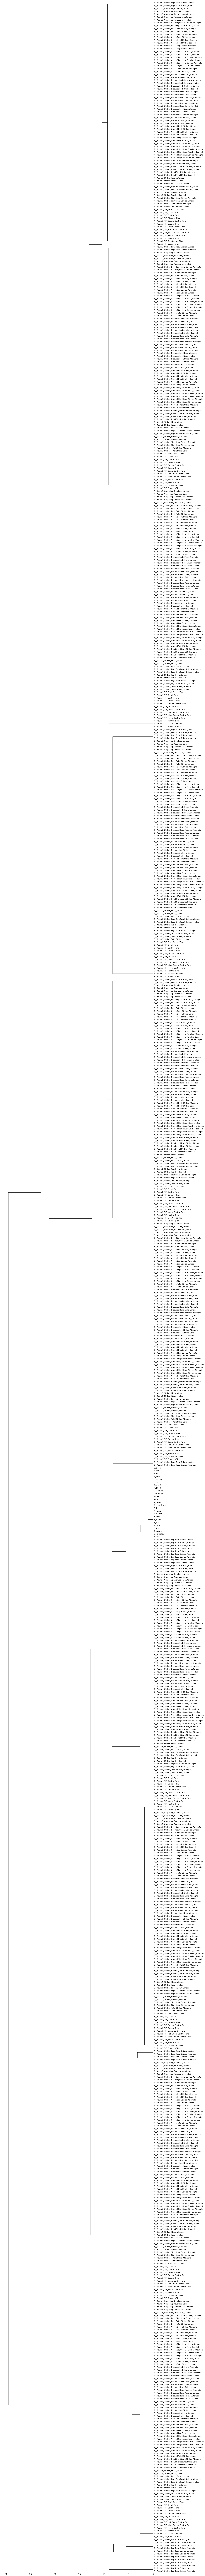

In [17]:
msno.dendrogram(data)

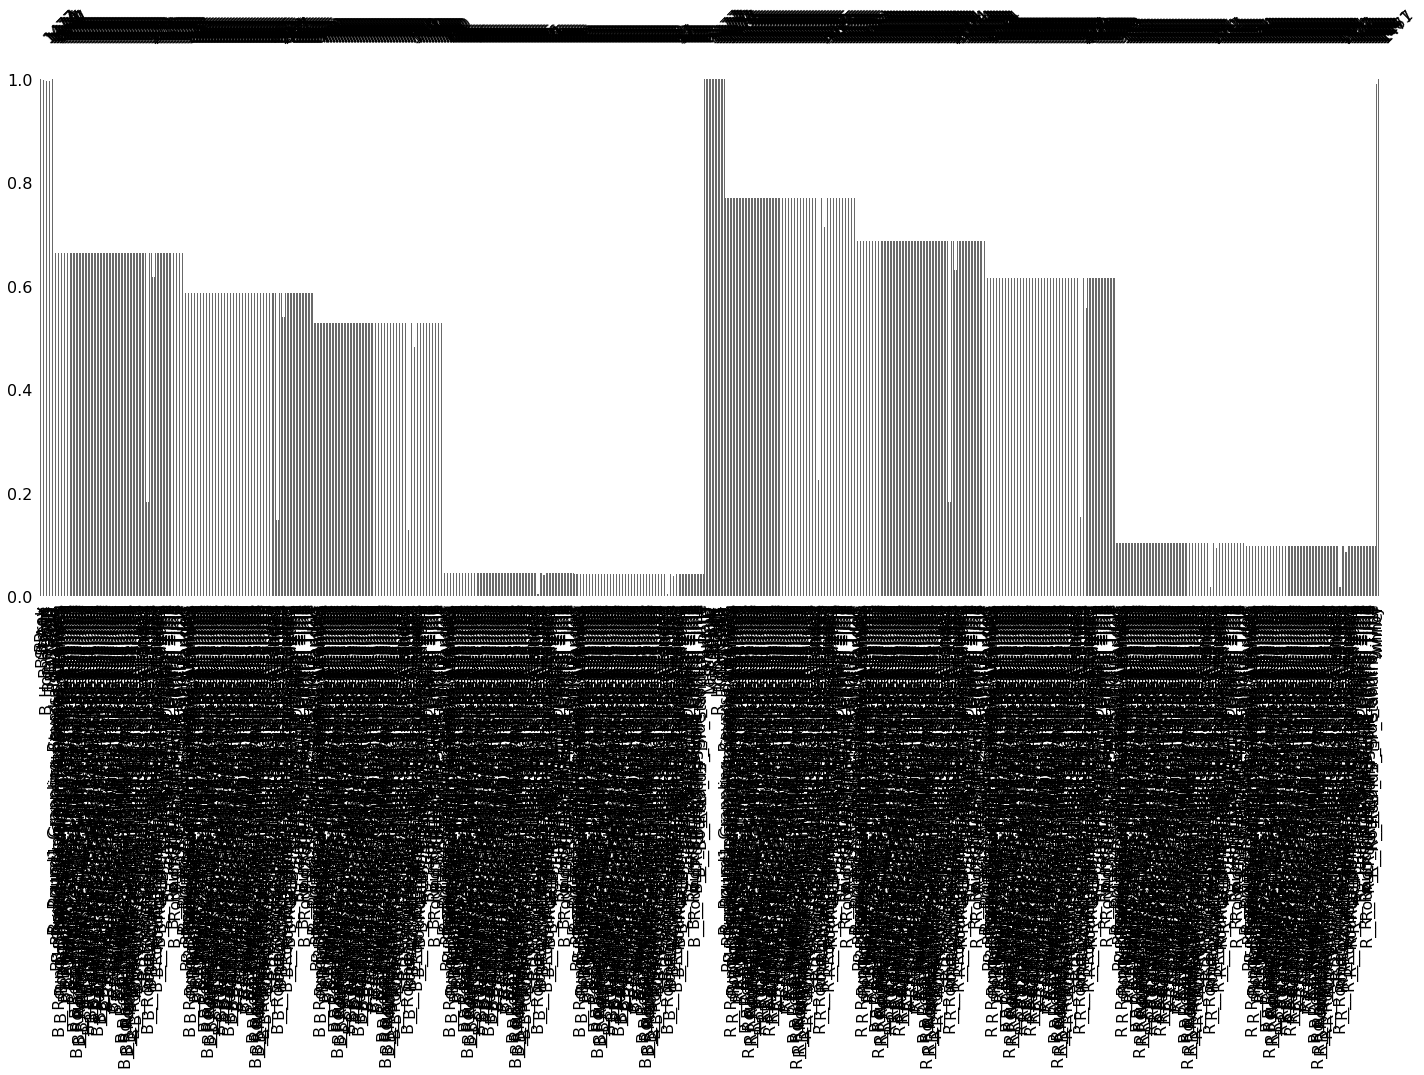

In [18]:
msno.bar(data)

In [19]:
data = data.dropna(axis=1, thresh= 0.50*1477)

In [20]:
data.columns

Index(['BPrev', 'BStreak', 'B_Age', 'B_Height', 'B_HomeTown', 'B_ID',
       'B_Location', 'B_Name', 'B_Weight',
       'B__Round1_Grappling_Reversals_Landed',
       ...
       'R__Round3_TIP_Ground Time', 'R__Round3_TIP_Guard Control Time',
       'R__Round3_TIP_Half Guard Control Time',
       'R__Round3_TIP_Misc. Ground Control Time',
       'R__Round3_TIP_Mount Control Time', 'R__Round3_TIP_Neutral Time',
       'R__Round3_TIP_Side Control Time', 'R__Round3_TIP_Standing Time',
       'winby', 'winner'],
      dtype='object', length=533)

In [22]:
data = data.dropna(axis=0,thresh=0.50*208)

In [23]:
data

BPrev  BStreak  B_Age  B_Height  \
0         1        1   23.0     182.0   
2         2        0   38.0     172.0   
3         0        0   23.0     170.0   
4         3        1   30.0     167.0   
5         0        0   38.0     180.0   
6         2        1   30.0     182.0   
7         0        0   27.0     177.0   
8         1        0   34.0     177.0   
9         2        1   33.0     182.0   
10        4        0   36.0     175.0   
13        0        0   44.0     177.0   
14        3        3   30.0     190.0   
15        2        2   30.0     190.0   
16        1        0   33.0     175.0   
20        0        0   30.0     170.0   
21        3        0   34.0     177.0   
23        1        1   31.0     177.0   
25        4        1   46.0     180.0   
27        2        1   24.0     177.0   
29        0        0   29.0     177.0   
30        1        0   32.0     160.0   
31        2        0   27.0     182.0   
32        3        0   32.0     160.0   
33        0        0   31.0     180.0   
35        3        3   28.0     175.0   
36        1        1   26.0     180.0   
37        1        1   28.0     170.0   
39        1        0   31.0     182.0   
40        1        0   26.0     177.0   
41        1        1   29.0     190.0   
...     ...      ...    ...       ...   
1438      5        4   33.0     185.0   
1440      2        1   36.0     187.0   
1441      3        3   30.0     187.0   
1442      2        1   28.0     177.0   
1443      1        1   33.0     175.0   
1445      1        0   34.0     193.0   
1446      4        0   30.0     187.0   
1447      5        0   36.0     187.0   
1449      3        3   29.0     170.0   
1450      0        0   29.0     170.0   
1451      1        1   46.0     180.0   
1452      1        0   32.0     185.0   
1453      0        0   21.0     182.0   
1455      1        1   38.0     170.0   
1456      0        0   22.0     165.0   
1457      1        1   24.0     172.0   
1459      1        1   37.0     175.0   
1460      0        0   30.0     170.0   
1461      0        0   30.0     170.0   
1462      1        1   32.0     185.0   
1463      0        0   35.0     170.0   
1464      4        4   25.0     172.0   
1465      0        0   30.0     157.0   
1467      3        0   32.0     180.0   
1470      1        1   32.0     172.0   
1471      3        2   37.0     190.0   
1473      2        1   26.0     165.0   
1474      3        2   36.0     187.0   
1475      3        1   31.0     167.0   
1476      2        1   31.0     187.0   

                                    B_HomeTown  B_ID  \
0                                 Trento Italy  2783   
2                               Kanagawa Japan   721   
3                               Tijuana Mexico  2825   
4                              Spokane, WA USA  2260   
5                                  Tehran Iran  1918   
6               St. Catharines, Ontario Canada  2507   
7                          Jefferson, Iowa USA  2262   
8                          Mansfield, Ohio USA  1817   
9                 Jales City, Sao Paulo Brazil  2080   
10                   Santa Ana, California USA  2041   
13                              Saigon Vietnam  1001   
14                                 Riga Latvia  2608   
15             The Republic of Dagestan Russia  2234   
16    Philadelphia, Pennsylvania United States   890   
20           St. Anthony , Newfoundland Canada  2862   
21                            Kona, Hawaii USA  1493   
23                   Quincy, Massachusetts USA  1982   
25                      Downey, California USA   129   
27          Jackson, Mississippi United States  2724   
29                       Chicago, Illinois USA  2771   
30             Clinton, Maryland United States  2352   
31                   Montclair, California USA  2263   
32                 Albuquerque, New Mexico USA  1904   
33               Santa Barbara, California USA  2805   
35                              Dublin Ireland  2057   
36     

#### Accuracy Measurements

In [26]:
data.fillna(value=0,inplace=True)

In [27]:
# Dropping values that do not make changes to predicitons
dropdata = data.drop(['B_ID','B_Name','R_ID','R_Name','winby','Date'],axis=1)

# Changing name of columns to keep normal naming convention
dropdata.rename(columns={'BPrev':'B__Prev', 'RPrev':'R__Prev', 'B_Age':'B__Age', 'B_Height':'B__Height', 'B_Weight':'B__Weight',
                         'R_Age':'R__Age', 'R_Height':'R__Height', 'R_Weight':'R__Weight', 'BStreak':'B__Streak', 'RStreak': 'R__Streak'},inplace=True)
dropdata.describe()

B__Prev    B__Streak       B__Age    B__Height    B__Weight  \
count  1235.000000  1235.000000  1235.000000  1235.000000  1235.000000   
mean      2.075304     0.782996    30.815385   177.401619    73.943320   
std       1.895144     1.111981     4.329417     9.946567    15.083292   
min       0.000000     0.000000     0.000000     0.000000    52.000000   
25%       1.000000     0.000000    28.000000   172.000000    65.000000   
50%       2.000000     0.000000    30.000000   177.000000    70.000000   
75%       3.000000     1.000000    33.000000   182.000000    84.000000   
max      11.000000     7.000000    46.000000   213.000000   120.000000   

       B__Round1_Grappling_Reversals_Landed  \
count                           1235.000000   
mean                               0.029150   
std                                0.173043   
min                                0.000000   
25%                                0.000000   
50%                                0.000000   
75%                                0.000000   
max                                2.000000   

       B__Round1_Grappling_Standups_Landed  \
count                          1235.000000   
mean                              0.710121   
std                               1.175184   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               1.000000   
max                               9.000000   

       B__Round1_Grappling_Submissions_Attempts  \
count                                1235.00000   
mean                                    0.34170   
std                                     0.75949   
min                                     0.00000   
25%                                     0.00000   
50%                                     0.00000   
75%                                     0.00000   
max                                     6.00000   

       B__Round1_Grappling_Takedowns_Attempts  \
count                             1235.000000   
mean                                 2.365182   
std                                  3.749479   
min                                  0.000000   
25%                                  0.000000   
50%                                  1.000000   
75%                                  3.000000   
max                                 33.000000   

       B__Round1_Grappling_Takedowns_Landed             ...               \
count                           1235.000000             ...                
mean                               0.958704             ...                
std                                1.637015             ...                
min                                0.000000             ...                
25%                                0.000000             ...                
50%                                0.000000             ...                
75%                                1.000000             ...                
max                               17.000000             ...                

       R__Round3_TIP_Distance Time  R__Round3_TIP_Ground Control Time  \
count                  1235.000000                        1235.000000   
mean                    204.517409                          71.961943   
std                     239.271125                         119.776782   
min                       0.000000                           0.000000   
25%                       0.000000                           0.000000   
50%                     143.000000                           4.000000   
75%                     298.000000                         116.000000   
max                    1568.000000                         995.000000   

       R__Round3_TIP_Ground Time  R__Round3_TIP_Guard Control Time  \
count                1235.000000                       1235.000000   
mean                  128.365992                         16.262348   
std                   165.694434                  

In [28]:
dropdata.describe(include=['O'])

B_HomeTown             B_Location             R_HomeTown  \
count                    1235                   1235                   1235   
unique                    505                    393                    444   
top     Rio de Janeiro Brazil  Rio de Janeiro Brazil  Rio de Janeiro Brazil   
freq                       26                     28                     38   

                   R_Location winner  
count                    1235   1235  
unique                    353      4  
top     Rio de Janeiro Brazil    red  
freq                       57    714

In [29]:
objecttypes = list(dropdata.select_dtypes(include=['O']).columns)
for col in objecttypes:
    dropdata[col] = dropdata[col].astype('category')

In [30]:
cat_columns = dropdata.select_dtypes(['category']).columns
dropdata[cat_columns] = dropdata[cat_columns].apply(lambda x: x.cat.codes)
dropdata.info()
dropdata.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235 entries, 0 to 1476
Columns: 527 entries, B__Prev to winner
dtypes: float64(511), int16(4), int64(11), int8(1)
memory usage: 4.9 MB


B__Prev  B__Streak  B__Age  B__Height  B_HomeTown  B_Location  \
1471        3          2    37.0      190.0         229         186   
1473        2          1    26.0      165.0         434         341   
1474        3          2    36.0      187.0         115          96   
1475        3          1    31.0      167.0         188         137   
1476        2          1    31.0      187.0         442         189   

      B__Weight  B__Round1_Grappling_Reversals_Landed  \
1471        119                                   0.0   
1473         56                                   0.0   
1474         93                                   0.0   
1475         52                                   0.0   
1476         84                                   0.0   

      B__Round1_Grappling_Standups_Landed  \
1471                                  1.0   
1473                                  1.0   
1474                                  0.0   
1475                                  0.0   
1476                                  0.0   

      B__Round1_Grappling_Submissions_Attempts   ...    \
1471                                       0.0   ...     
1473                                       0.0   ...     
1474                                       1.0   ...     
1475                                       0.0   ...     
1476                                       2.0   ...     

      R__Round3_TIP_Ground Control Time  R__Round3_TIP_Ground Time  \
1471                                0.0                        0.0   
1473                              155.0                      155.0   
1474                              259.0                      259.0   
1475                              211.0                      211.0   
1476                              244.0                      244.0   

      R__Round3_TIP_Guard Control Time  R__Round3_TIP_Half Guard Control Time  \
1471                               0.0                                    0.0   
1473                              10.0                                   73.0   
1474                              34.0                                   66.0   
1475                             171.0                                    7.0   
1476                               0.0                                   26.0   

      R__Round3_TIP_Misc. Ground Control Time  \
1471                                      0.0   
1473                                     57.0   
1474                                      0.0   
1475                                      0.0   
1476                                      0.0   

      R__Round3_TIP_Mount Control Time  R__Round3_TIP_Neutral Time  \
1471                               0.0                         0.0   
1473                               1.0                       389.0   
1474                              85.0                        32.0   
1475                              33.0                       572.0   
1476                              17.0                        56.0   

      R__Round3_TIP_Side Control Time  R__Round3_TIP_Standing Time  winner  
1471                              0.0                          0.0       3  
1473                             14.0                        446.0       3  
1474                             24.0                         41.0       0  
1475                              0.0                        686.0       0  
1476                              0.0                         56.0       3  

[5 rows x 527 columns]

Data Correlation

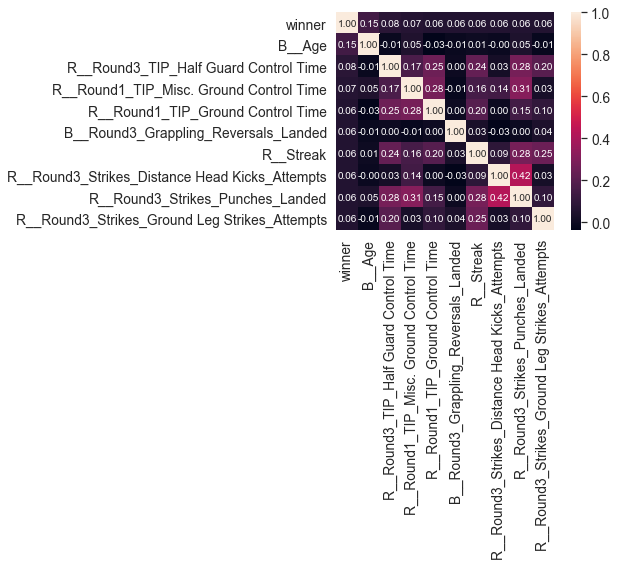

In [31]:
# Subset Correlation Matrix
k = 10 #number of variables for heatmap
corrmat = dropdata.corr()
cols = corrmat.nlargest(k, 'winner')['winner'].index
cm = np.corrcoef(dropdata[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Modeling

We're evaluating the following models

- Perceptron
- Random Forests
- Decision Trees Classifier
- SGD Classifier
- Linear SVC
- Gaussian NB
- KNN

In [32]:
def percep(X_train,Y_train,X_test,Y_test,Models):
    perceptron = Perceptron(max_iter = 1000, tol = 0.001)
    perceptron.fit(X_train, Y_train)
    Y_pred = perceptron.predict(X_test)
    Models['Perceptron'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def ranfor(X_train,Y_train,X_test,Y_test,Models):
    randomfor = RandomForestClassifier(max_features="sqrt",
                                       n_estimators = 700,
                                       max_depth = None,
                                       n_jobs=-1
                                     )
    randomfor.fit(X_train,Y_train)
    Y_pred = randomfor.predict(X_test)
    Models['Random Forests'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def dec_tree(X_train,Y_train,X_test,Y_test,Models):
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, Y_train)
    Y_pred = decision_tree.predict(X_test)
    Models['Decision Tree'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def SGDClass(X_train,Y_train,X_test,Y_test,Models):
    sgd = SGDClassifier(max_iter = 1000, tol = 0.001)
    sgd.fit(X_train, Y_train)
    Y_pred = sgd.predict(X_test)
    Models['SGD Classifier'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def linSVC(X_train,Y_train,X_test,Y_test,Models):
    linear_svc = LinearSVC()
    linear_svc.fit(X_train, Y_train)
    Y_pred = linear_svc.predict(X_test)
    Models['SVM'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def bayes(X_train,Y_train,X_test,Y_test,Models):
    gaussian = GaussianNB()
    gaussian.fit(X_train, Y_train)
    Y_pred = gaussian.predict(X_test)
    Models['Bayes'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def Nearest(X_train,Y_train,X_test,Y_test,Models):
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    Models['KNN'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]

def run_all_and_Plot(df):
    Models = dict()
    from sklearn.model_selection import train_test_split
    X_all = df.drop(['winner'], axis=1)
    y_all = df['winner']
    X_train, X_test, Y_train, Y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=0)
    percep(X_train,Y_train,X_test,Y_test,Models)
    ranfor(X_train,Y_train,X_test,Y_test,Models)
    dec_tree(X_train,Y_train,X_test,Y_test,Models)
    SGDClass(X_train,Y_train,X_test,Y_test,Models)
    linSVC(X_train,Y_train,X_test,Y_test,Models)
    bayes(X_train,Y_train,X_test,Y_test,Models)
    Nearest(X_train,Y_train,X_test,Y_test,Models)
    return Models

def plot_bar(dict):
    labels = tuple(dict.keys())
    y_pos = np.arange(len(labels))
    values = [dict[n][0] for n in dict]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, labels,rotation='vertical')
    plt.ylabel('accuracy')
    plt.title('Accuracy of different models')
    plt.show()

def plot_cm(dict):
    count = 1
    fig = plt.figure(figsize=(10,10))
    for model in dict:
        cm = dict[model][1]
        labels = ['W','L','N','D']
        ax = fig.add_subplot(4,4,count)
        cax = ax.matshow(cm)
        plt.title(model,y=-0.8)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        # plt.subplot(2,2,count)
        count+=1
    plt.tight_layout()
    plt.show()

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Perceptron 0.5425101214574899
Random Forests 0.5303643724696356
Decision Tree 0.4251012145748988
SGD Classifier 0.4898785425101215
SVM 0.5303643724696356
Bayes 0.4493927125506073
KNN 0.5182186234817814


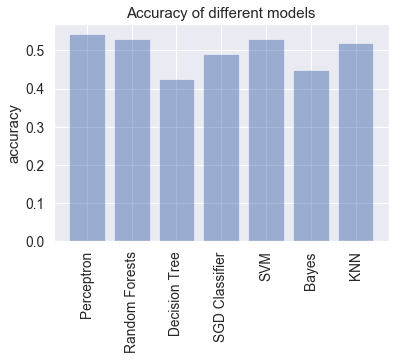

In [33]:
accuracies = run_all_and_Plot(dropdata)
CompareAll = dict()
CompareAll['Baseline'] = accuracies
for key,val in accuracies.items():
    print(str(key) +' '+ str(val[0]))
plot_bar(accuracies)

**In the initial comparison, Perceptron, Random Forest & SVM have the accuracy at 54.25%, 53.04% and 53.04% respectively.**

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
dontchange = ['winner','Event_ID','Fight_ID','Max_round','Last_round','B_Age','R_Age']
numeric_cols = [col for col in dropdata if col not in dontchange]
dropdata[numeric_cols] += 1 

In [36]:
newDF = dropdata.copy()
blue_cols = [col for col in dropdata.columns if 'B__' in col]
red_cols = [col for col in dropdata.columns if 'R__' in col]
for (blue,red) in zip(blue_cols,red_cols):
    newkey = ''.join(str(blue).split('_')[2:])
    dropdata[newkey] = dropdata[str(blue)]/dropdata[str(red)]
    del dropdata[str(blue)]
    del dropdata[str(red)]

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Perceptron 0.5546558704453441
Random Forests 0.5506072874493927
Decision Tree 0.5384615384615384
SGD Classifier 0.4534412955465587
SVM 0.4493927125506073
Bayes 0.4331983805668016
KNN 0.47368421052631576


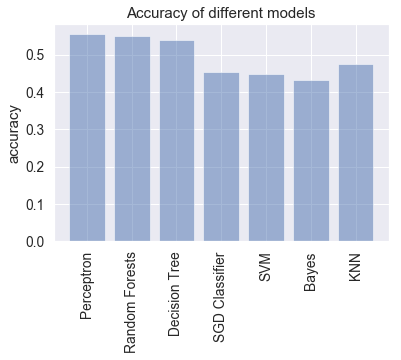

In [37]:
accuracies = run_all_and_Plot(dropdata)
for key,val in accuracies.items():
    print(str(key) +' '+ str(val[0]))
CompareAll['Blue/Red'] = accuracies
plot_bar(accuracies)

**Dropping Round 4 and Round 5 since most fights are 3 round Max.**

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Perceptron 0.5546558704453441
Random Forests 0.4898785425101215
Decision Tree 0.5182186234817814
SGD Classifier 0.44129554655870445
SVM 0.5344129554655871
Bayes 0.4331983805668016
KNN 0.47368421052631576


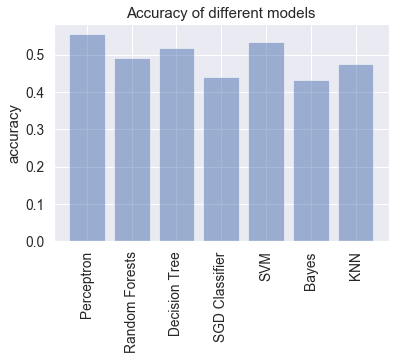

In [38]:
drop4 = [col for col in dropdata.columns if "Round4" in col]
drop5 = [col for col in dropdata.columns if "Round5" in col]
threerounds = dropdata.drop(drop4+drop5,axis = 1)
accuracies = run_all_and_Plot(threerounds)
for key,val in accuracies.items():
    print(str(key)+' '+str(val[0]))
CompareAll['DropR4&R5'] = accuracies
plot_bar(accuracies)

**After dropping the 4th and 5th rounds we get a slight change in accuracy, with Perceptron remaining at the highest accuracy, and SVM being second, however Random Forrest gets overtaken by Decision Tree**

**Dropping 5 round fights entirely**

Perceptron 0.5546558704453441
Random Forests 0.5101214574898786
Decision Tree 0.562753036437247
SGD Classifier 0.5060728744939271
SVM 0.44534412955465585
Bayes 0.4291497975708502
KNN 0.47368421052631576


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


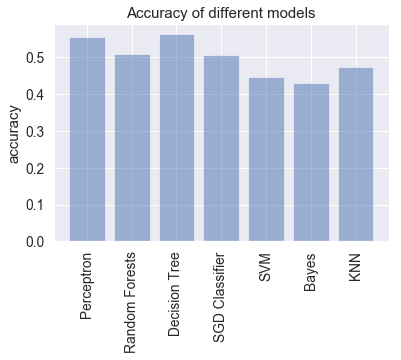

In [41]:
dropfifth = threerounds.loc[threerounds['Max_round'] == 3]
bewb = threerounds.drop(['Max_round','Last_round'],axis=1)
accuracies = run_all_and_Plot(bewb)
for key,val in accuracies.items():
    print(str(key)+' '+str(val[0]))
CompareAll['Drop5RoundFights'] = accuracies
plot_bar(accuracies)

**Dropping only the 5th round, Decision Tree gains a greater accuracy than Perceptron with SVM no longer being an accurate measurement option**

**Dropping First Fights**

Perceptron 0.44329896907216493
Random Forests 0.5670103092783505
Decision Tree 0.5103092783505154
SGD Classifier 0.4484536082474227
SVM 0.4690721649484536
Bayes 0.3917525773195876
KNN 0.520618556701031


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


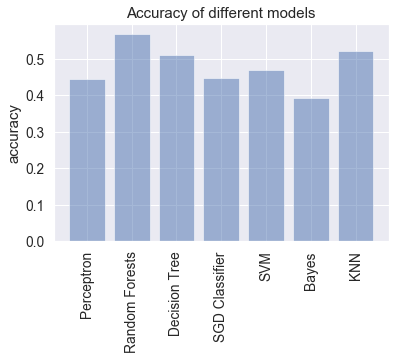

In [43]:
dropfirst = bewb[bewb.Prev != 1]
accuracies = run_all_and_Plot(dropfirst)
for key,val in accuracies.items():
    print(str(key)+' '+str(val[0]))
CompareAll['DroppingDebut'] = accuracies
plot_bar(accuracies)

**Dropping only the 1st round, Random Forests gains a greater accuracy than Perceptron**

In [44]:
blue_cols
newDF.info()
b_feats = list(set([x[10:] for x in blue_cols if "Round" in x]))
r_feats = list(set([x[10:] for x in red_cols if "Round" in x]))
def sumshit(b_feats,cols):
    for x in b_feats:
        newDF.loc[:,x] = 0
        for y in cols:
            if x in y:
                newDF[x] += newDF[y]
                newDF.drop(y,axis=1,inplace=True)
sumshit(b_feats,blue_cols)
sumshit(r_feats,red_cols)
newDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235 entries, 0 to 1476
Columns: 527 entries, B__Prev to winner
dtypes: float64(511), int16(4), int64(11), int8(1)
memory usage: 4.9 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235 entries, 0 to 1476
Columns: 104 entries, B__Prev to Strikes_Distance Body Strikes_Attempts
dtypes: float64(88), int16(4), int64(11), int8(1)
memory usage: 975.7 KB


Perceptron 0.43243243243243246
Random Forests 0.581081081081081
Decision Tree 0.5472972972972973
SGD Classifier 0.6148648648648649
SVM 0.5878378378378378
Bayes 0.24324324324324326
KNN 0.5337837837837838


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


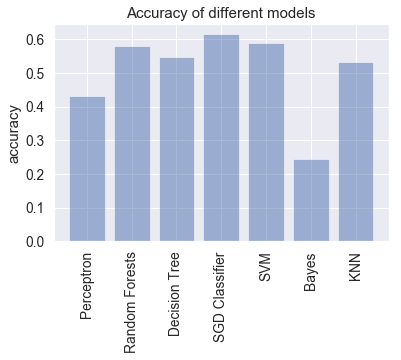

In [43]:
newDF.describe()
accuracies = run_all_and_Plot(newDF)
for key,val in accuracies.items():
    print(str(key) +' '+ str(val[0]))
CompareAll['SumRounds'] = accuracies
plot_bar(accuracies)

In [44]:
blue_cols = [col for col in newDF.columns if 'B__' in col]
red_cols = [col for col in newDF.columns if 'R__' in col]
for (blue,red) in zip(blue_cols,red_cols):
    newkey = ''.join(str(blue).split('_')[2:])
    newDF[newkey] = newDF[str(blue)]/newDF[str(red)]
    del newDF[str(blue)]
    del newDF[str(red)]

Perceptron 0.4358108108108108
Random Forests 0.6047297297297297
Decision Tree 0.4966216216216216
SGD Classifier 0.6081081081081081
SVM 0.25675675675675674
Bayes 0.25
KNN 0.5405405405405406


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


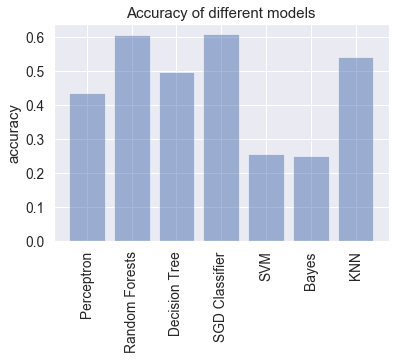

In [45]:
accuracies = run_all_and_Plot(newDF)
for key,val in accuracies.items():
    print(str(key) +' '+ str(val[0]))
CompareAll['SumRounds'] = accuracies
plot_bar(accuracies)

#### Reducing data complexity by dropping multiple columns

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Perceptron 0.6182432432432432
Random Forests 0.5912162162162162
Decision Tree 0.5236486486486487
SGD Classifier 0.3783783783783784
SVM 0.2972972972972973
Bayes 0.22972972972972974
KNN 0.5337837837837838


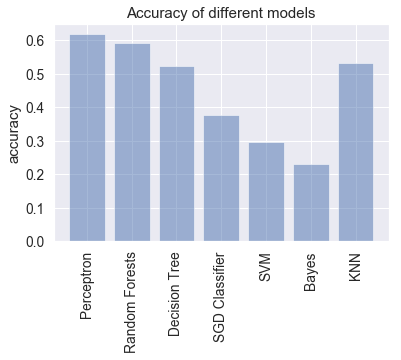

In [46]:
reduced_features = newDF.drop(["Weight","B_HomeTown","B_Location", "Event_ID", "Fight_ID", 
                               "Max_round", "Last_round", "R_HomeTown", "R_Location"],axis = 1)
accuracies = run_all_and_Plot(reduced_features)
for key,val in accuracies.items():
    print(str(key) +' '+ str(val[0]))
CompareAll['Idunno'] = accuracies
plot_bar(accuracies)

In [47]:
reduced_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 90 columns):
winner                                         1477 non-null int8
Strikes_Clinch Leg Strikes_Attempts            1477 non-null float64
TIP_Ground Control Time                        1477 non-null float64
Strikes_Legs Total Strikes_Attempts            1477 non-null float64
Strikes_Body Total Strikes_Landed              1477 non-null float64
Strikes_Distance Body Kicks_Attempts           1477 non-null float64
Strikes_Clinch Head Strikes_Attempts           1477 non-null float64
Grappling_Reversals_Landed                     1477 non-null float64
Grappling_Takedowns_Attempts                   1477 non-null float64
Strikes_Distance Body Punches_Landed           1477 non-null float64
Strikes_Distance Head Kicks_Attempts           1477 non-null float64
Strikes_Ground Body Strikes_Attempts           1477 non-null float64
Strikes_Distance Head Kicks_Landed             1477 non-null float64

### Conclusion

Using these 7 models the best predictive value lies between 58-63% on average between runs. With a very low accuracy model, this dataset proves to not be the best for our project. In the Data Explorations we notice that round 4 and 5 have no effect on the accuracy of the dataset, thus by dropping them, our dataset is easier to understand and get accurate results from.

From the analysis we can conclude that Perceptron is the best model for measuring accuracy, as this model give the greatest percentage accuracy for multiple senarios, with between 1 and 6 percent difference between it and the second best model. That said, we believe this is the best model for accuracy with the given amount of available data and its inherent noise.

With another dataset these models may not be as accurate.
